In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import mpld3
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.tools import FigureFactory as FF
tls.set_credentials_file(username='mmainzer', api_key='1fhs3tcl9m')

from IPython.display import HTML

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [94]:
df = pd.read_csv('../../assets/capstone-assets/CCRPI/master.csv')

In [95]:
df.head()

,year,sysID,sysName,schoolID,schoolName,grd,ccrpi,street,city,county,state,zip,locClass,titleI,chrtr,totStudnts,crprlPun,dtntn,iss,oss,altSchl,physRest,busSusp,explsn,other_discipline_action,pctDisc,bully,disCond,gngRel,hom,sexRelated,drugAlc,weapons,thftRbry,violence,pctBehavrs,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,2015,601,Appling County,103,Appling County High School,H,73.6,482 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,No,No,1063,0,0,349,90,10,0,8,0,103,0.429915,0,304,2,0,7,41,2,3,43,0.378175,16.4,5721.49,18817718.34,726.0,0.0,0.106680,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8
1,2015,601,Appling County,177,Appling County Elementary School,E,68.8,680 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,Yes,No,619,29,0,0,15,0,0,7,0,1,0.082391,0,0,0,0,1,0,3,0,10,0.022617,14.3,4936.78,18817718.34,480.0,1.0,0.093857,55.1,38.6,6.3,46,1,0,29,19,4,47,7,12.8,8.7,0.0,2.0
2,2015,601,Appling County,195,Appling County Middle School,M,68.8,2997 Blackshear Hwy,Baxley,Appling County,GA,31513,41.0,Yes,No,826,34,0,159,33,3,10,8,0,4,0.299031,4,8,0,0,7,5,1,2,39,0.079903,15.6,5703.74,18817718.34,553.0,0.0,0.102865,48.1,41.2,10.8,38,1,0,22,12,4,62,4,11.2,1.4,2.2,7.0
3,2015,601,Appling County,1050,Altamaha Elementary School,E,72.3,344 Altamaha School Rd,Baxley,Appling County,GA,31513,42.0,Yes,No,361,40,0,0,0,0,0,1,0,0,0.113573,0,3,0,0,0,0,0,0,0,0.008310,14.9,6076.04,18817718.34,264.0,0.0,0.105128,44.9,42.7,12.5,34,0,0,6,6,2,86,2,13.2,4.1,0.0,6.2
4,2015,601,Appling County,5050,Fourth District Elementary School,E,68.2,13396 Blackshear Hwy,Surrency,Appling County,GA,31563,43.0,Yes,No,164,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,0,0,0,0,1,0,0.006098,14.2,5533.32,18817718.34,130.0,0.0,0.121387,43.3,45.7,11.0,33,0,0,9,9,5,78,5,8.6,2.6,0.0,2.0


In [96]:
df.locClass.fillna(21, inplace=True)

In [97]:
df.pctGiftd.fillna(0, inplace=True)

In [98]:
#Normalize the feature columns so the x axes in our subplots are all on the same scale.
cols_to_norm = ['stdTchRatio', 'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess',
                'pctAbsSix-Fiftn', 'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess',
                'pctAbsSix-Fiftn', 'pctOverFiftn','pctSnapTanfHmls', 'pctAsian','pctNative','pctBlck','pctHisp',
                'pctMulti','pctWhite','pctMigrant','pctSPED','pctESOL','pctAltProg','pctGiftd']

df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

In [99]:
df2 = df[['ccrpi', 'sysID','sysName','schoolID','schoolName', 'grd', 'locClass','titleI','chrtr','stdTchRatio',
          'expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile','pctAbs5orLess','pctAbsSix-Fiftn',
          'pctOverFiftn','pctSnapTanfHmls', 'pctAsian','pctNative','pctBlck','pctHisp','pctMulti','pctWhite',
         'pctMigrant','pctSPED','pctESOL','pctAltProg','pctGiftd']]

In [100]:
df2.head(1)

,ccrpi,sysID,sysName,schoolID,schoolName,grd,locClass,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,73.6,601,Appling County,103,Appling County High School,H,33.0,No,No,-0.00133,0.030486,-0.196321,0.123673,-0.14861,-0.028077,-0.141073,0.033689,0.154379,-0.053013,-0.026174,-0.026553,-0.149997,-0.017973,-0.117462,0.202852,0.194902,0.023484,-0.046515,0.051644,-0.04831


In [101]:
df2['titleI'] = df2['titleI'].map({'No': 0, 'Yes': 1} )
df2['chrtr'] = df2['chrtr'].map({'No': 0, 'Yes': 1} )

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
#keep the list of feature names because once we run pca and convert that to a correlation table, we'll want
#these instead of 0, 1, 2, etc.
features = df2.iloc[:,7:]

In [103]:
x = df2.ix[:,7:].values
y = df2.ix[:,0].values
xStandardized = pd.DataFrame(StandardScaler().fit_transform(x))

In [104]:
cov_mat = np.cov(xStandardized.T)

In [105]:
#Decompose the covariance matrix to find the eigenvalues
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [106]:
#Now sort the eigenpairs from highest to lowest.
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

In [107]:
#Display the value for each vector and sort. 
eigenPairs.reverse()
for i in eigenPairs:
    print (i[0])

0.000415462571355
1.49841779786e-05
0.435202515333
0.393058963785
0.351091828109
0.466103831189
0.308415495292
0.565910296456
0.14380500379
0.106034253396
0.593259318275
0.752130828456
0.776667533606
0.90263732695
0.978328644572
1.06413573427
1.169926098
1.2300091795
1.60151188032
1.71222201542
2.30119189364
2.98519771392
4.17495024044


In [108]:
eigenValSum = sum(eigenValues)
#calculate the degree to which each eigenPair contributes to the variance
varExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]
cumVarExplained = np.cumsum(varExplained)

In [109]:
# trace1 = Bar(x=['PC %s' %i for i in range(1,24)], y=varExplained, showlegend=False)

# trace2 = Scatter(x=['PC %s' %i for i in range(1,24)], y=cumVarExplained, name='Cumulative Explained Variance')

# data = Data([trace1, trace2])

# layout=Layout (yaxis=YAxis(title='Percent of Explained Variance'), title='Explained Variance by Principal Component')

# fig = Figure(data=data, layout=layout)
# py.iplot(fig)

tls.embed("https://plot.ly/~mmainzer/141/explained-variance-by-principal-component/")

In [110]:
pca = PCA(n_components=12)
pcaDf = pd.DataFrame(pca.fit_transform(xStandardized), columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6',
                                                               'PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])

In [111]:
df2.head(1)

,ccrpi,sysID,sysName,schoolID,schoolName,grd,locClass,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,73.6,601,Appling County,103,Appling County High School,H,33.0,0,0,-0.00133,0.030486,-0.196321,0.123673,-0.14861,-0.028077,-0.141073,0.033689,0.154379,-0.053013,-0.026174,-0.026553,-0.149997,-0.017973,-0.117462,0.202852,0.194902,0.023484,-0.046515,0.051644,-0.04831


In [112]:
#We'll want to visualize our data after PCA, but see where each airport lies within the subspace, so I created
#a new dataframe that gives our 3 principal components and where each airport lies along that component.
pcaDf['ccrpi'] = df2['ccrpi']
pcaDf['sysID'] = df2['sysID']
pcaDf['sysName'] = df2['sysName']
pcaDf['schoolID'] = df2['schoolID']
pcaDf['schoolName'] = df2['schoolName']
pcaDf['grd'] = df2['grd']

In [113]:
pcaDf.head(1)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,ccrpi,sysID,sysName,schoolID,schoolName,grd
0,0.528029,-2.019699,-1.152166,-0.077278,1.596462,-1.184891,0.351226,0.070413,0.619833,1.917773,-1.991159,0.34004,73.6,601,Appling County,103,Appling County High School,H


In [114]:
pcaFeatureCorr = pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2','PC-3','PC-4',
                                                                                'PC-5','PC-6','PC-7','PC-8',
                                                                                'PC-9','PC-10','PC-11','PC-12'])

In [115]:
pd.set_option('display.max_columns', None)
pcaFeatureCorr

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
PC-1,0.337870,-0.025304,-0.002631,0.090896,-0.120342,0.218998,-0.151607,0.255187,-0.127127,0.013743,0.198879,0.449915,-0.247407,-0.041382,0.353957,0.039426,-0.181512,-0.323833,0.068403,0.036552,0.064569,0.078468,-0.352338
PC-2,-0.013538,0.084375,0.083045,-0.130531,0.362260,0.185710,0.066874,0.051858,0.421411,-0.389610,-0.262012,-0.008938,0.209264,0.033214,0.151272,0.309451,-0.004001,-0.346122,-0.013700,-0.151167,0.301633,0.011582,0.016040
PC-3,-0.103086,0.156366,0.202890,0.152481,-0.099020,-0.242195,-0.213543,0.117504,0.287540,-0.323161,-0.112842,0.068071,0.001520,0.020015,0.265577,-0.465676,0.019767,-0.042288,-0.224584,-0.093924,-0.431423,0.176260,0.041689
PC-4,-0.179541,-0.102805,-0.028514,-0.208887,0.300832,0.329728,0.402558,0.064209,-0.230080,-0.007950,0.397710,-0.075741,0.134307,-0.108650,0.196813,-0.155224,0.001818,-0.147586,-0.331106,0.069478,-0.254559,0.141840,0.128875
PC-5,-0.115228,0.057712,0.513416,-0.037203,-0.053934,-0.024908,0.017457,0.240841,-0.083737,-0.075039,0.227816,-0.098198,-0.031521,0.120882,-0.227571,0.176717,-0.119742,0.156203,0.173190,-0.103370,0.123677,0.623190,-0.026158
PC-6,0.150156,-0.473814,0.214487,-0.121034,-0.042374,-0.009323,0.196798,0.190071,0.200336,-0.102783,-0.219704,0.034914,-0.187143,-0.122633,-0.084805,0.004921,0.375187,0.095527,-0.078730,0.532449,-0.030784,0.046262,-0.124168
PC-7,0.104265,-0.215846,0.274469,-0.496690,-0.233041,0.175292,0.023538,-0.469008,0.077885,-0.029650,-0.097118,0.044328,-0.206327,-0.248923,0.050378,-0.090000,-0.208006,0.044704,0.069845,-0.347564,-0.093774,-0.026214,0.031766
PC-8,-0.077004,-0.354787,0.102857,-0.066097,0.201867,-0.282980,-0.426982,0.163397,-0.130497,0.233636,-0.048857,0.023627,0.390989,-0.501310,0.044940,-0.016785,-0.107893,-0.100112,-0.040602,-0.036686,0.117637,0.043360,0.044563
PC-9,0.021835,0.207914,-0.010711,0.411091,-0.074808,0.127159,0.186042,-0.040265,0.123141,-0.196403,0.018177,-0.030867,-0.099374,-0.641866,-0.104647,0.098741,-0.359393,0.104526,0.029092,0.227815,0.000887,0.004294,0.196830
PC-10,-0.078152,-0.401582,-0.147741,-0.013020,0.017151,0.059299,-0.077698,0.007047,0.099086,-0.218394,0.084653,0.054032,0.167111,0.332803,0.033650,-0.107489,-0.439940,0.013130,0.471456,0.276013,-0.145272,-0.035108,0.259328


In [116]:
features.dtypes

titleI               int64
chrtr                int64
stdTchRatio        float64
expPerStudent      float64
salBenSum          float64
freeLnch           float64
reducedLnch        float64
pctMobile          float64
pctAbs5orLess      float64
pctAbsSix-Fiftn    float64
pctOverFiftn       float64
pctSnapTanfHmls    float64
pctAsian           float64
pctNative          float64
pctBlck            float64
pctHisp            float64
pctMulti           float64
pctWhite           float64
pctMigrant         float64
pctSPED            float64
pctESOL            float64
pctAltProg         float64
pctGiftd           float64
dtype: object

In [126]:
# Any correlation over over .3 in the first 3 components, we'll keep

# titleI, salBenSum, pctAbsSix-Fiftn, pctSnapTanfHmls, pctBlck, pctHisp, pctWhite, pctSPED, pctESOL, pctGiftd

# the problem here is that we have categorical data, with titleI, but we can't just drop it 
# since it correlates so strongly to PC-1'

X = features[['titleI', 'salBenSum','pctAbsSix-Fiftn', 'pctSnapTanfHmls',
                'pctBlck','pctHisp','pctWhite','pctSPED','pctESOL','pctGiftd']]
X = StandardScaler().fit_transform(X)

For 2 clusters the average Silhouette Score is : 0.245004304881


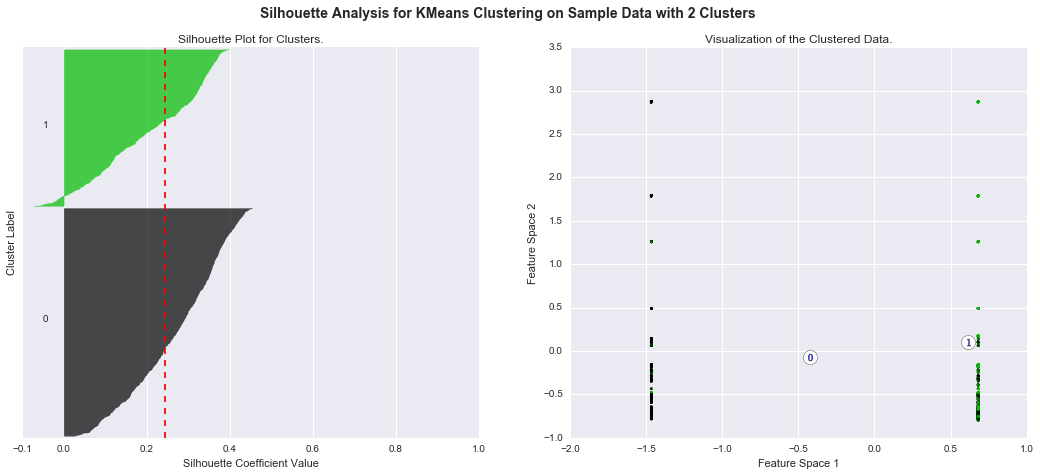

For 3 clusters the average Silhouette Score is : 0.262006084544


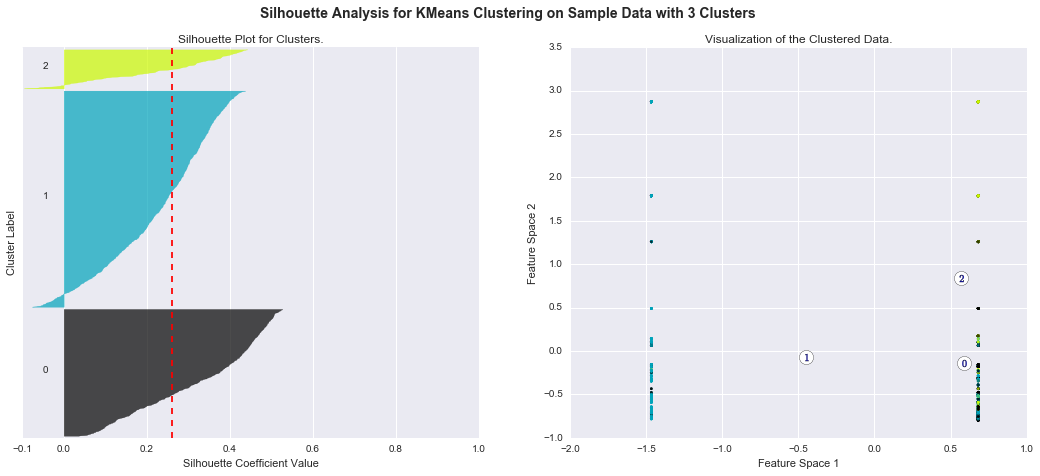

For 4 clusters the average Silhouette Score is : 0.25764494989


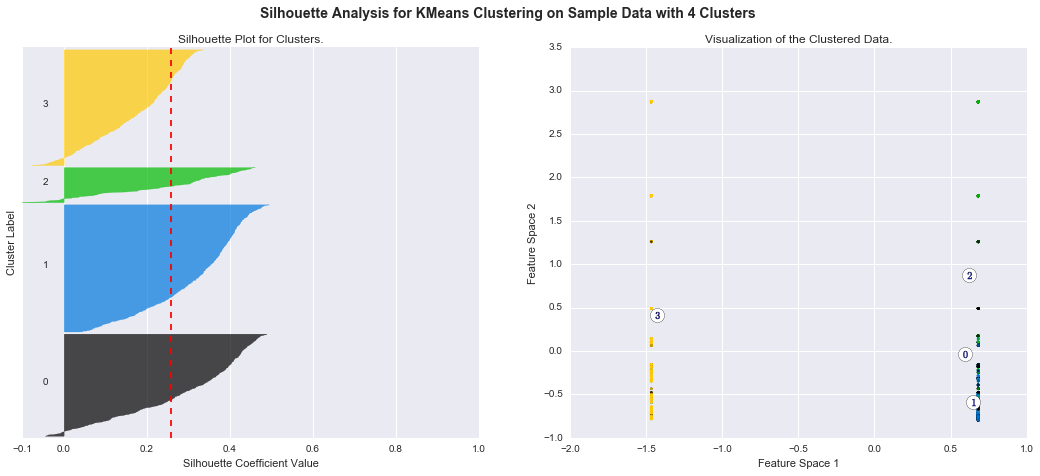

For 5 clusters the average Silhouette Score is : 0.257459715512


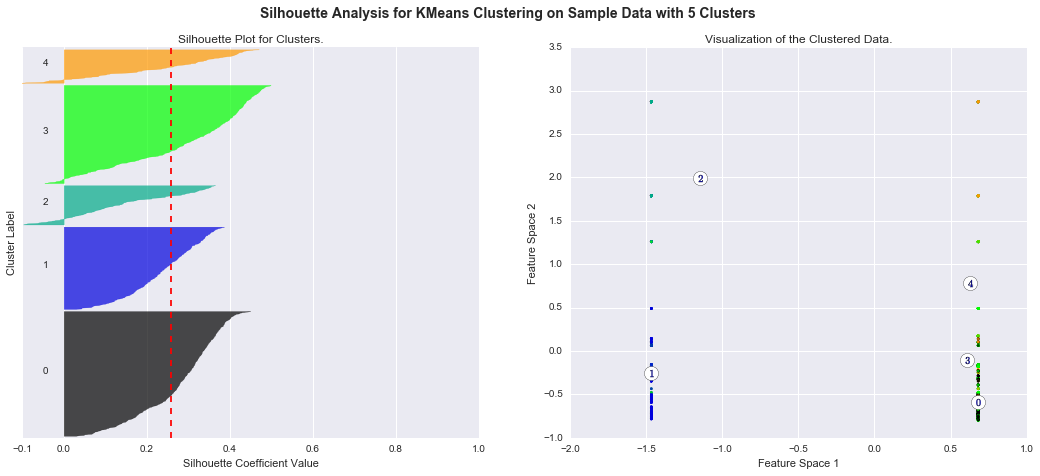

For 6 clusters the average Silhouette Score is : 0.250371816716


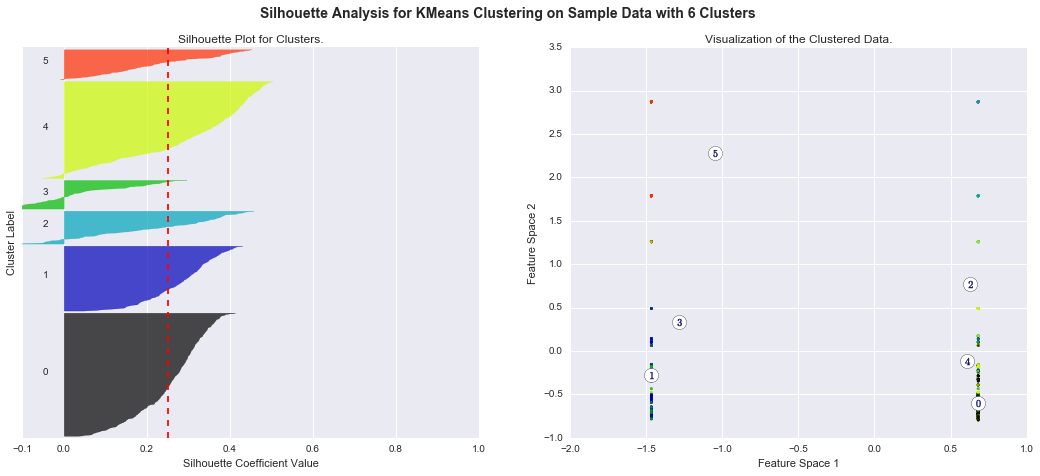

In [133]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='minkowski')
    print "For", n_clusters, "clusters", "the average Silhouette Score is :", silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("Silhouette Plot for Clusters.")
    ax1.set_xlabel("Silhouette Coefficient Value")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the Clustered Data.")
    ax2.set_xlabel("Feature Space 1")
    ax2.set_ylabel("Feature Space 2")

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Sample Data "
                  "with %d Clusters" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()